C:\Users\Aldert\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


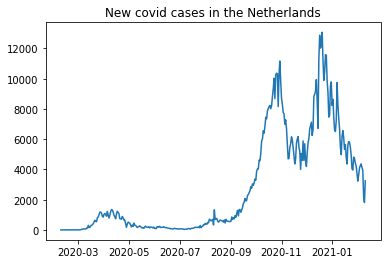

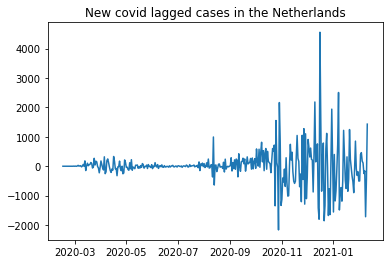

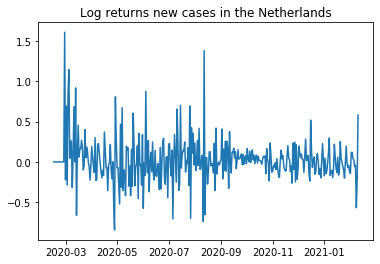

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data ="owid-covid-data.xlsx"

data = pd.read_excel(data)

data_netherlands = data[data['location']=="Netherlands"]


first_difference = data_netherlands['new_cases'].diff()
data_netherlands['first_difference_new_cases'] = first_difference


plt.plot(data_netherlands['date'],data_netherlands['new_cases'],)
plt.title("New covid cases in the Netherlands")
plt.show()


plt.plot(data_netherlands['date'],data_netherlands['first_difference_new_cases'],)
plt.title("New covid lagged cases in the Netherlands")
plt.show()

covid_nl = np.log(data_netherlands['new_cases'] / data_netherlands['new_cases'].shift(1))
plt.plot(data_netherlands['date'],covid_nl)
plt.title("Log returns new cases in the Netherlands")
plt.show()

In [2]:
from scipy import stats


jarque_bera_test_lagged = stats.jarque_bera(data_netherlands['first_difference_new_cases'].dropna().to_numpy())
jarque_bera_test = stats.jarque_bera(data_netherlands['new_cases'].dropna().to_numpy())
jarque_bera_test_log = stats.jarque_bera(covid_nl)


print("JB test lagged", jarque_bera_test_lagged)
print("JB test cases data",jarque_bera_test)
#print("JB test log returns covid",jarque_bera_test_log)

JB test lagged (2137.924288534535, 0.0)
JB test cases data (62.991908509258614, 2.098321516541546e-14)


C:\Users\Aldert\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Aldert\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Aldert\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


In [3]:
from statsmodels.tsa.stattools import adfuller

def DickeyFuller(data):
    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key,value))
    if result[0] < result[4]["5%"]:
        print("Reject H0 - Time Series is Stationary")
    else:
        print("Failed to Reject H0 - Time Series is Non-Stationary")
        

In [4]:
from statsmodels.tsa.stattools import adfuller

def AugmentedDickeyFuller(data):
    result = adfuller(data, regression="ct")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key,value))
    if result[0] < result[4]["5%"]:
        print("Reject H0 - Time Series is Stationary")
    else:
        print("Failed to Reject H0 - Time Series is Non-Stationary")

In [5]:
DickeyFuller(data_netherlands['new_cases'].dropna().to_numpy())

ADF Statistic: -1.820111
p-value: 0.370524
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
Failed to Reject H0 - Time Series is Non-Stationary


In [6]:
DickeyFuller(data_netherlands['first_difference_new_cases'].dropna().to_numpy())

ADF Statistic: -3.692212
p-value: 0.004224
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
Reject H0 - Time Series is Stationary


In [7]:
AugmentedDickeyFuller(data_netherlands['new_cases'].dropna().to_numpy())
print("Adjusted on trend + constant")

ADF Statistic: -2.564792
p-value: 0.296360
Critical Values:
	1%: -3.986
	5%: -3.424
	10%: -3.135
Failed to Reject H0 - Time Series is Non-Stationary
Adjusted on trend + constant


In [8]:
DickeyFuller(covid_nl.dropna().to_numpy())
print("Log return covid cases")

ADF Statistic: -4.038247
p-value: 0.001223
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
Reject H0 - Time Series is Stationary
Log return covid cases


In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

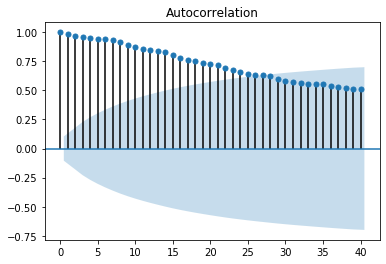

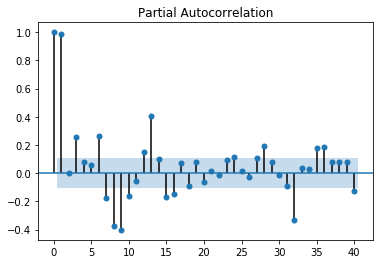

In [10]:
new_cases = data_netherlands['new_cases']
lagged_new_cases = data_netherlands['first_difference_new_cases']

new_cases = new_cases.dropna()
lagged_new_cases = lagged_new_cases.dropna()

new_cases = new_cases.to_numpy()
lagged_new_cases = lagged_new_cases.to_numpy()

plot_acf(new_cases, lags=40)
plot_pacf(new_cases, lags=40)

plt.show()

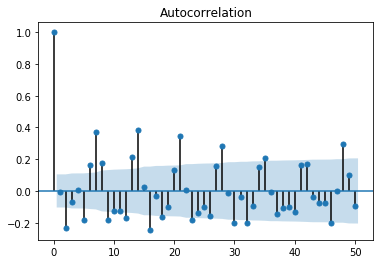

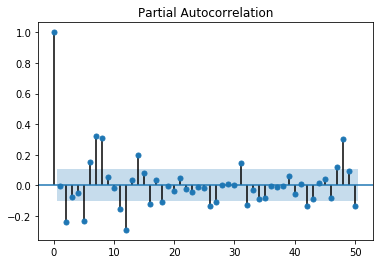

In [11]:
plot_acf(lagged_new_cases, lags=50)
plot_pacf(lagged_new_cases, lags=50)
plt.show()

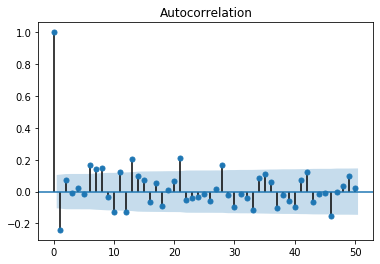

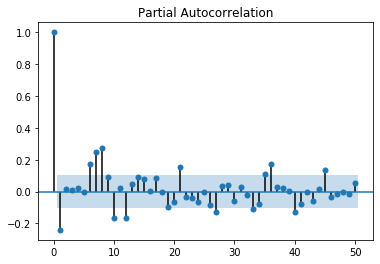

In [12]:
plot_acf(covid_nl.dropna().to_numpy(), lags=50)
plot_pacf(covid_nl.dropna().to_numpy(), lags=50)
plt.show()

In [13]:
from statsmodels.tsa.ar_model import AR
series = data_netherlands['first_difference_new_cases'].dropna().to_numpy()
mdl = AR(series).fit(maxlag=40, ic='aic')

%time est_order = AR(series).select_order(maxlag=30, ic='aic')

a=0.9
true_order = 1

print('\nalpha estimate: {:3.5f} | best lag order = {}'
  .format(mdl.params[0], est_order))
print('\ntrue alpha = {} | true order = {}'
  .format(a, true_order))


C:\Users\Aldert\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Wall time: 1min 14s

alpha estimate: 3.70461 | best lag order = 27

true alpha = 0.9 | true order = 1


In [14]:
mdl = AR(series).fit(maxlag=40, ic='bic')

%time est_order = AR(series).select_order(maxlag=30, ic='bic')

a=0.6
true_order = 1

print('\nalpha estimate: {:3.5f} | best lag order = {}'
  .format(mdl.params[0], est_order))
print('\ntrue alpha = {} | true order = {}'
  .format(a, true_order))

Wall time: 1min 11s

alpha estimate: 3.77464 | best lag order = 14

true alpha = 0.6 | true order = 1


In [15]:
from statsmodels.tsa.arima_model import ARIMA
order=(14,1,0)
series = data_netherlands['first_difference_new_cases'].dropna().to_numpy()


model = ARIMA(series, order)
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  351
Model:                ARIMA(14, 1, 0)   Log Likelihood               -2660.418
Method:                       css-mle   S.D. of innovations            469.559
Date:                Thu, 25 Feb 2021   AIC                           5352.836
Time:                        16:18:13   BIC                           5414.609
Sample:                             1   HQIC                          5377.421
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5370      2.738     -0.196      0.845      -5.904       4.830
ar.L1.D.y     -1.1925      0.053    -22.476      0.000      -1.296      -1.089
ar.L2.D.y     -1.3307      0.080    -16.618      0.0

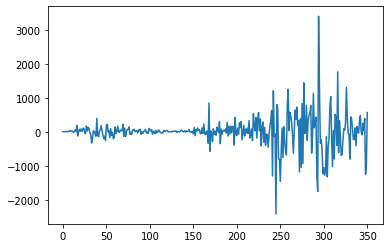

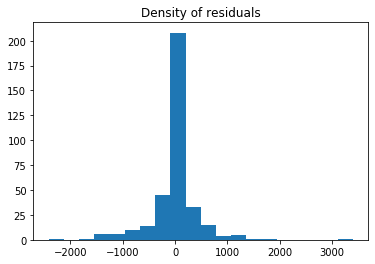

count     351.000000
mean        0.086306
std       470.230719
min     -2419.457455
25%       -79.070916
50%         9.611933
75%       105.519368
max      3398.053142
dtype: float64


In [16]:
# line plot of residuals
residuals = model_fit.resid
residuals = pd.Series(residuals)
plt.plot(residuals)
plt.show()
# density plot of residuals
plt.hist(residuals, bins=20)
plt.title("Density of residuals")
plt.show()
# summary stats of residuals
print(residuals.describe())

In [17]:
import pandas as pd

eur_usd = pd.read_csv("EURUSD=X.csv")
aex = pd.read_csv("AEX.csv")
oil = pd.read_csv("BZ=f.csv")
eufn = pd.read_csv("EUFN.csv")
spx = pd.read_csv("SPX.csv")
dax = pd.read_csv("GDAXI.csv")


In [18]:
eur_usd['Date']=pd.to_datetime(eur_usd['Date'], dayfirst=True)
aex['Date']=pd.to_datetime(aex['Date'], dayfirst=True)
oil['Date']=pd.to_datetime(oil['Date'], dayfirst=True)
eufn['Date']=pd.to_datetime(eufn['Date'], dayfirst=True)
spx['Date']=pd.to_datetime(spx['Date'], dayfirst=True)
dax['Date']=pd.to_datetime(dax['Date'], dayfirst=True)


In [19]:
eur_usd.set_index(eur_usd["Date"], inplace=True)
aex.set_index(aex["Date"], inplace=True)
oil.set_index(oil["Date"], inplace=True)
eufn.set_index(eufn["Date"], inplace=True)
spx.set_index(spx["Date"], inplace=True)
dax.set_index(dax["Date"], inplace=True)

eur_usd = eur_usd.add_suffix("_eur_usd")
aex = aex.add_suffix("_aex")
oil = oil.add_suffix("_oil")
eufn = eufn.add_suffix("_eufn")
spx = spx.add_suffix("_spx")
dax = dax.add_suffix("_dax")

In [20]:
data_finance = pd.merge(aex,eur_usd, right_index=True, left_index=True)
data_finance = pd.merge(data_finance, oil, right_index=True, left_index=True)
data_finance = pd.merge(data_finance, eufn, right_index=True, left_index=True)
data_finance = pd.merge(data_finance, spx, right_index=True, left_index=True)
data_finance = pd.merge(data_finance, dax, right_index=True, left_index=True)

In [21]:
data_finance = data_finance.sort_index()

In [22]:
oil_returns = np.log(data_finance.Close_oil)  - np.log(data_finance.Close_oil.shift(1)).dropna()

oil_returns = oil_returns *100

In [23]:
data_finance = data_finance.loc['2020-03-10':'2020-04-30']

In [24]:
aex_returns = np.log(data_finance.Close_aex / data_finance.Close_aex.shift(1)).dropna()
dax_returns = np.log(data_finance.Close_dax / data_finance.Close_dax.shift(1)).dropna()
spx_returns = np.log(data_finance.Close_spx / data_finance.Close_spx.shift(1)).dropna()
eur_usd_returns = np.log(data_finance.Close_eur_usd / data_finance.Close_eur_usd.shift(1)).dropna()

In [25]:
#benchmark prior to covid-19
benchmark_aex = 25
benchmark_eufn = 25
benchmark_spx = 25

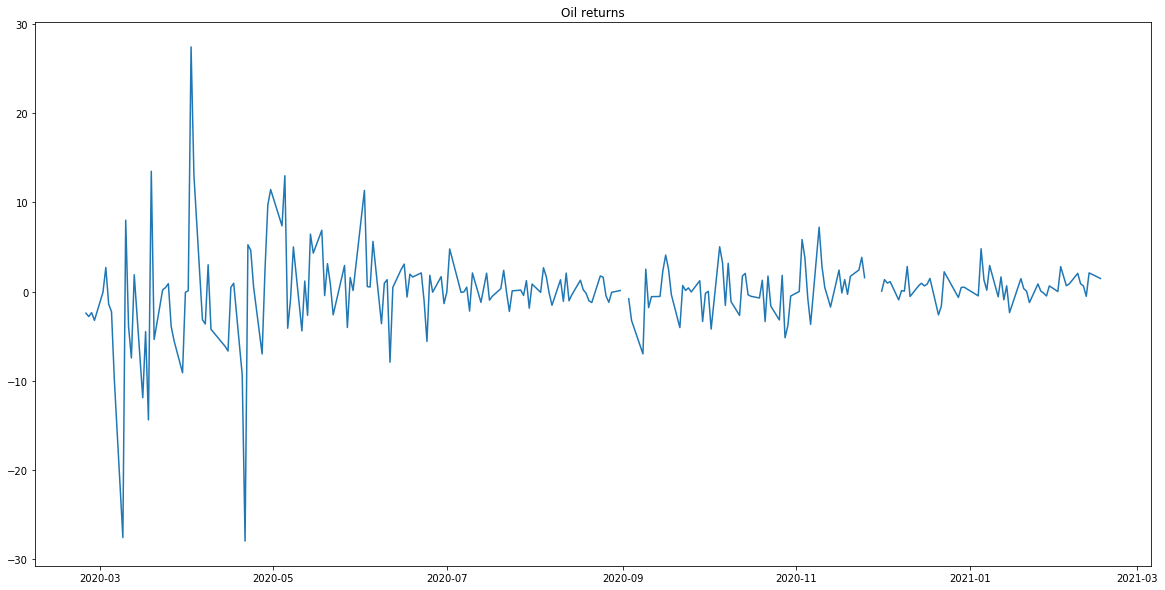

In [26]:
plt.figure(figsize=(20,10))
plt.plot(oil_returns)
plt.title("Oil returns")
plt.show()

In [27]:
data.set_index(data['date'], inplace=True)

data['new_cases_normalized'] = data['new_cases']/data['population']

covid_nl = data[data['location']=='Netherlands']
covid_ger = data[data['location']=='Germany']
covid_us = data[data['location']=='United States']

covid_nl = covid_nl.loc['2020-03-09':'2020-04-30']
covid_ger = covid_ger.loc['2020-03-09':'2020-04-30']
covid_us = covid_us.loc['2020-03-09':'2020-04-30']


covid_nl = np.log(covid_nl.new_cases_normalized / covid_nl.new_cases_normalized.shift(1))
covid_ger = np.log(covid_ger.new_cases_normalized / covid_ger.new_cases_normalized.shift(1))
covid_us = np.log(covid_us.new_cases_normalized / covid_us.new_cases_normalized.shift(1))

In [28]:
#devide the data set in 3 different sub-samples covid

In [29]:
first_sample_covid_nl = covid_nl.loc['2020-03-10':'2020-03-31']
first_sample_covid_ger = covid_ger.loc['2020-03-10':'2020-03-31']
first_sample_covid_us = covid_us.loc['2020-03-10':'2020-03-31']

In [30]:
second_sample_covid_nl = covid_nl.loc['2020-03-10':'2020-04-10']
second_sample_covid_ger = covid_ger.loc['2020-03-10':'2020-04-10']
second_sample_covid_us = covid_us.loc['2020-03-10':'2020-04-10']

In [31]:
third_sample_covid_nl = covid_nl.loc['2020-03-10':'2020-04-17']
third_sample_covid_ger = covid_ger.loc['2020-03-10':'2020-04-17']
third_sample_covid_us = covid_us.loc['2020-03-10':'2020-04-17']

In [32]:
#devide the data set in 3 different sub-samples stock market returns

In [33]:
first_sample_aex_returns = aex_returns.loc['2020-03-10':'2020-03-31']
first_sample_dax_returns = dax_returns.loc['2020-03-10':'2020-03-31']
first_sample_spx_returns = spx_returns.loc['2020-03-10':'2020-03-31']

In [34]:
second_sample_aex_returns = aex_returns.loc['2020-03-10':'2020-04-10']
second_sample_dax_returns = dax_returns.loc['2020-03-10':'2020-04-10']
second_sample_spx_returns = spx_returns.loc['2020-03-10':'2020-04-10']

In [35]:
third_sample_aex_returns = aex_returns.loc['2020-03-10':'2020-04-17']
third_sample_dax_returns = dax_returns.loc['2020-03-10':'2020-04-17']
third_sample_spx_returns = spx_returns.loc['2020-03-10':'2020-04-17']

In [36]:
#devide the data set in 3 different sub-samples OIl & FOREX

In [37]:
first_sample_eur_usd_returns = eur_usd_returns.loc['2020-03-10':'2020-03-31']
first_sample_oil_returns = oil_returns.loc['2020-03-10':'2020-03-31']

In [38]:
second_sample_eur_usd_returns = eur_usd_returns.loc['2020-03-10':'2020-04-10']
second_sample_oil_returns = oil_returns.loc['2020-03-10':'2020-04-10']

In [39]:
third_sample_eur_usd_returns = eur_usd_returns.loc['2020-03-10':'2020-04-17']
third_sample_oil_returns = oil_returns.loc['2020-03-10':'2020-04-17']

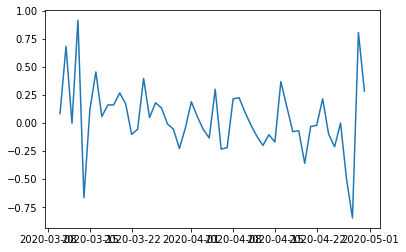

In [40]:
#assumptio 12 March Netherlands report 0 new cases, for the log returns the new cases is set to 0.00001

plt.plot(covid_nl)
plt.show()

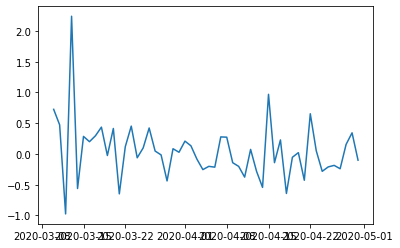

In [41]:
plt.plot(covid_ger)
plt.show()

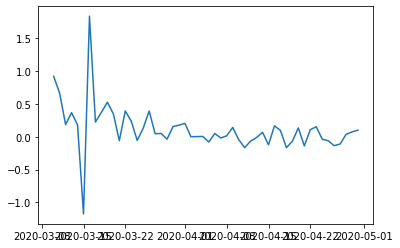

In [42]:
plt.plot(covid_us)
plt.show()

In [43]:
print("covid_nl")
DickeyFuller(covid_nl.dropna().to_numpy())

covid_nl
ADF Statistic: -1.067047
p-value: 0.728033
Critical Values:
	1%: -3.593
	5%: -2.932
	10%: -2.604
Failed to Reject H0 - Time Series is Non-Stationary


In [44]:
print("covid_ger")
DickeyFuller(covid_ger.dropna().to_numpy())


covid_ger
ADF Statistic: -4.280795
p-value: 0.000479
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605
Reject H0 - Time Series is Stationary


In [45]:
print("covid_us")
DickeyFuller(covid_us.dropna().to_numpy())
AugmentedDickeyFuller(covid_us.dropna().to_numpy())

covid_us
ADF Statistic: -3.201796
p-value: 0.019881
Critical Values:
	1%: -3.597
	5%: -2.933
	10%: -2.605
Reject H0 - Time Series is Stationary
ADF Statistic: -2.859668
p-value: 0.175893
Critical Values:
	1%: -4.170
	5%: -3.511
	10%: -3.185
Failed to Reject H0 - Time Series is Non-Stationary


In [46]:
print("AEX stationarity")
DickeyFuller(aex_returns.dropna().to_numpy())

AEX stationarity
ADF Statistic: -4.388730
p-value: 0.000311
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
Reject H0 - Time Series is Stationary


In [47]:
print("DAX stationarity")
DickeyFuller(dax_returns.dropna().to_numpy())

DAX stationarity
ADF Statistic: -4.638823
p-value: 0.000109
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
Reject H0 - Time Series is Stationary


In [48]:
print("SPX stationarity")
DickeyFuller(spx_returns.dropna().to_numpy())

SPX stationarity
ADF Statistic: -3.183675
p-value: 0.020949
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
Reject H0 - Time Series is Stationary


In [49]:
print("EURO/USD stationarity")
DickeyFuller(eur_usd_returns.dropna().to_numpy())

EURO/USD stationarity
ADF Statistic: -3.571538
p-value: 0.006329
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
Reject H0 - Time Series is Stationary


In [50]:
print("Oil stationarity")
DickeyFuller(oil_returns.dropna().to_numpy())

Oil stationarity
ADF Statistic: -13.471535
p-value: 0.000000
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
Reject H0 - Time Series is Stationary


In [51]:
print("First Sub-sample covid NL")
DickeyFuller(first_sample_covid_nl)

First Sub-sample covid NL
ADF Statistic: 2.604105
p-value: 0.999076
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Failed to Reject H0 - Time Series is Non-Stationary


In [52]:
print("First Sub-sample covid GER")
AugmentedDickeyFuller(first_sample_covid_ger) 

First Sub-sample covid GER
ADF Statistic: -8.770353
p-value: 0.000000
Critical Values:
	1%: -4.469
	5%: -3.645
	10%: -3.261
Reject H0 - Time Series is Stationary


In [53]:
print("First sub-sample covid US")
AugmentedDickeyFuller(first_sample_covid_us) 

First sub-sample covid US
ADF Statistic: -1.524739
p-value: 0.820513
Critical Values:
	1%: -4.884
	5%: -3.822
	10%: -3.359
Failed to Reject H0 - Time Series is Non-Stationary


In [55]:
print("Second Sub-sample covid NL")
DickeyFuller(second_sample_covid_nl)

Second Sub-sample covid NL
ADF Statistic: -4.578800
p-value: 0.000141
Critical Values:
	1%: -3.670
	5%: -2.964
	10%: -2.621
Reject H0 - Time Series is Stationary


In [56]:
print("Second Sub-sample covid GER")
AugmentedDickeyFuller(first_sample_covid_ger) 

Second Sub-sample covid GER
ADF Statistic: -8.770353
p-value: 0.000000
Critical Values:
	1%: -4.469
	5%: -3.645
	10%: -3.261
Reject H0 - Time Series is Stationary


In [57]:
print("Second Sub-sample covid US")
AugmentedDickeyFuller(first_sample_covid_us) 

Second Sub-sample covid US
ADF Statistic: -1.524739
p-value: 0.820513
Critical Values:
	1%: -4.884
	5%: -3.822
	10%: -3.359
Failed to Reject H0 - Time Series is Non-Stationary


In [58]:
print("Third Sub-sample covid NL")
DickeyFuller(third_sample_covid_nl)

Third Sub-sample covid NL
ADF Statistic: -0.942249
p-value: 0.773741
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
Failed to Reject H0 - Time Series is Non-Stationary


In [59]:
print("Third Sub-sample covid NL")
DickeyFuller(third_sample_covid_ger)

Third Sub-sample covid NL
ADF Statistic: -9.668777
p-value: 0.000000
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609
Reject H0 - Time Series is Stationary


In [60]:
print("Third Sub-sample covid NL")
AugmentedDickeyFuller(third_sample_covid_us)

Third Sub-sample covid NL
ADF Statistic: -6.454823
p-value: 0.000000
Critical Values:
	1%: -4.227
	5%: -3.537
	10%: -3.200
Reject H0 - Time Series is Stationary


In [61]:
print("First sub sample AEX")
DickeyFuller(first_sample_aex_returns)

First sub sample AEX
ADF Statistic: -3.802583
p-value: 0.002881
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691
Reject H0 - Time Series is Stationary


In [62]:
print("First sub sample DAX")
DickeyFuller(first_sample_dax_returns)

First sub sample DAX
ADF Statistic: -4.031122
p-value: 0.001256
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691
Reject H0 - Time Series is Stationary


In [63]:
print("First sub sample SPX")
DickeyFuller(first_sample_spx_returns)

First sub sample SPX
ADF Statistic: -6.176255
p-value: 0.000000
Critical Values:
	1%: -4.012
	5%: -3.104
	10%: -2.691
Reject H0 - Time Series is Stationary


In [64]:
print("Second sub sample AEX")
DickeyFuller(second_sample_aex_returns)

Second sub sample AEX
ADF Statistic: -6.022120
p-value: 0.000000
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Reject H0 - Time Series is Stationary


In [65]:
print("Second sub sample DAX")
DickeyFuller(second_sample_dax_returns)

Second sub sample DAX
ADF Statistic: -5.766603
p-value: 0.000001
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Reject H0 - Time Series is Stationary


In [66]:
print("Second sub sample SPX")
DickeyFuller(second_sample_spx_returns)

Second sub sample SPX
ADF Statistic: -6.973151
p-value: 0.000000
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Reject H0 - Time Series is Stationary


In [67]:
print("Third sub sample AEX")
DickeyFuller(third_sample_aex_returns)

Third sub sample AEX
ADF Statistic: -5.326185
p-value: 0.000005
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
Reject H0 - Time Series is Stationary


In [68]:
print("Third sub sample DAX")
AugmentedDickeyFuller(third_sample_dax_returns)

Third sub sample DAX
ADF Statistic: -2.565979
p-value: 0.295797
Critical Values:
	1%: -4.668
	5%: -3.731
	10%: -3.309
Failed to Reject H0 - Time Series is Non-Stationary


In [69]:
print("third sub sample SPX")
AugmentedDickeyFuller(third_sample_spx_returns)

third sub sample SPX
ADF Statistic: -4.189881
p-value: 0.004637
Critical Values:
	1%: -4.668
	5%: -3.731
	10%: -3.309
Reject H0 - Time Series is Stationary


In [70]:
print("first sub sample oil")
AugmentedDickeyFuller(first_sample_oil_returns)

first sub sample oil
ADF Statistic: -5.398845
p-value: 0.000036
Critical Values:
	1%: -4.728
	5%: -3.757
	10%: -3.323
Reject H0 - Time Series is Stationary


In [71]:
print("second sub sample oil")
AugmentedDickeyFuller(second_sample_oil_returns)

second sub sample oil
ADF Statistic: -2.302773
p-value: 0.432417
Critical Values:
	1%: -4.799
	5%: -3.787
	10%: -3.340
Failed to Reject H0 - Time Series is Non-Stationary


In [72]:
print("third sub sample oil")
DickeyFuller(third_sample_oil_returns)

third sub sample oil
ADF Statistic: -4.425860
p-value: 0.000267
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
Reject H0 - Time Series is Stationary


In [73]:
print("first sub sample eur usd")
AugmentedDickeyFuller(first_sample_eur_usd_returns)

first sub sample eur usd
ADF Statistic: -2.837936
p-value: 0.183360
Critical Values:
	1%: -4.799
	5%: -3.787
	10%: -3.340
Failed to Reject H0 - Time Series is Non-Stationary


In [74]:
print("Second sub sample eur usd")
DickeyFuller(second_sample_eur_usd_returns)

Second sub sample eur usd
ADF Statistic: -3.306501
p-value: 0.014590
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Reject H0 - Time Series is Stationary


In [75]:
print("Third sub sample eur usd")
AugmentedDickeyFuller(third_sample_eur_usd_returns)

Third sub sample eur usd
ADF Statistic: -5.804781
p-value: 0.000006
Critical Values:
	1%: -4.668
	5%: -3.731
	10%: -3.309
Reject H0 - Time Series is Stationary


Iteration:      5,   Func. Count:     35,   Neg. LLF: 616.7031881438207
Iteration:     10,   Func. Count:     70,   Neg. LLF: 612.2110270403336
Iteration:     15,   Func. Count:    101,   Neg. LLF: 611.7834988518208
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 611.7721836839193
            Iterations: 18
            Function evaluations: 119
            Gradient evaluations: 18
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Close_oil   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -611.772
Distribution:                  Normal   AIC:                           1231.54
Method:            Maximum Likelihood   BIC:                           1245.43
                                        No. Observations:                  238
Date:               

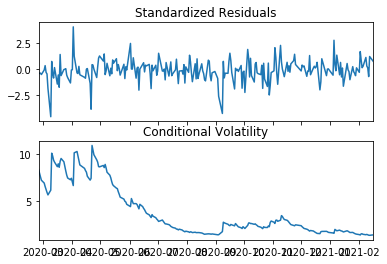

In [76]:
from arch import arch_model

am = arch_model(oil_returns.dropna())
res = am.fit(update_freq=5)
var = res.conditional_volatility
print(res.summary())
fig = res.plot()

oil_returns = var.loc['2020-03-10':'2020-04-30']

In [77]:
from prettytable import PrettyTable
table = PrettyTable()

In [78]:
table.field_names = ["Period", "Stock Market", "Exchange Rates", "Oil", "Covid"]
table.add_row(["First Sub-sample", "< 0.01", "Non-Stationary", "< 0.01", "< 0.01*"])
table.add_row(["Second Sub-sample", "< 0.01", "< 0.05", "Non-Stationary", "< 0.01*"])
table.add_row(["Third Sub-sample", "< 0.01**", "< 0.01", "< 0.01", "< 0.01"])
table.add_row(["Full sample", "< 0.05", "< 0.01","< 0.01","< 0.01",])

In [79]:
print(table)

+-------------------+--------------+----------------+----------------+---------+
|       Period      | Stock Market | Exchange Rates |      Oil       |  Covid  |
+-------------------+--------------+----------------+----------------+---------+
|  First Sub-sample |    < 0.01    | Non-Stationary |     < 0.01     | < 0.01* |
| Second Sub-sample |    < 0.01    |     < 0.05     | Non-Stationary | < 0.01* |
|  Third Sub-sample |   < 0.01**   |     < 0.01     |     < 0.01     |  < 0.01 |
|    Full sample    |    < 0.05    |     < 0.01     |     < 0.01     |  < 0.01 |
+-------------------+--------------+----------------+----------------+---------+


In [80]:
y_nl = aex_returns

X_nl = pd.merge(eur_usd_returns, oil_returns, right_index=True, left_index=True)
X_nl = pd.merge(X_nl,covid_nl, right_index=True, left_index=True)

In [81]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [82]:
y_ger = dax_returns

X_ger = pd.merge(eur_usd_returns, oil_returns,right_index=True, left_index=True)
X_ger = pd.merge(X_ger,covid_ger, right_index=True, left_index=True)

In [83]:
y_us = spx_returns

X_us = pd.merge(eur_usd_returns, oil_returns, right_index=True, left_index=True)
X_us = pd.merge(X_us,covid_us, right_index=True, left_index=True)

In [84]:
first_sample_y_nl = y_nl.loc['2020-03-10':'2020-03-31']
first_sample_X_nl = X_nl.loc['2020-03-10':'2020-03-31']

first_sample_y_ger = y_ger.loc['2020-03-10':'2020-03-31']
first_sample_X_ger = X_ger.loc['2020-03-10':'2020-03-31']

first_sample_y_us = y_us.loc['2020-03-10':'2020-03-31']
first_sample_X_us = X_us.loc['2020-03-10':'2020-03-31']

In [85]:
second_sample_y_nl = y_nl.loc['2020-03-10':'2020-04-10']
second_sample_X_nl = X_nl.loc['2020-03-10':'2020-04-10']

second_sample_y_ger = y_ger.loc['2020-03-10':'2020-04-10']
second_sample_X_ger = X_ger.loc['2020-03-10':'2020-04-10']

second_sample_y_us = y_us.loc['2020-03-10':'2020-04-10']
second_sample_X_us = X_us.loc['2020-03-10':'2020-04-10']

In [86]:
third_sample_y_nl = y_nl.loc['2020-03-10':'2020-04-17']
third_sample_X_nl = X_nl.loc['2020-03-10':'2020-04-17']

third_sample_y_ger = y_ger.loc['2020-03-10':'2020-04-17']
third_sample_X_ger = X_ger.loc['2020-03-10':'2020-04-17']

third_sample_y_us = y_us.loc['2020-03-10':'2020-04-17']
third_sample_X_us = X_us.loc['2020-03-10':'2020-04-17']

In [87]:
#Regression NL

In [88]:
regressor=LinearRegression()
regressor.fit(X_nl,y_nl)
full_param_nl = regressor.coef_

mod = sm.OLS(y_nl, X_nl)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
print(full_param_nl)

Close_eur_usd           0.847620
cond_vol                0.725985
new_cases_normalized    0.950983
Name: P>|t|, dtype: float64
[ 0.23837912  0.00271131 -0.00058217]


In [89]:
regressor=LinearRegression()
regressor.fit(first_sample_X_nl,first_sample_y_nl)
first_param_nl = regressor.coef_

mod = sm.OLS(first_sample_y_nl, first_sample_X_nl)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
print(first_param_nl)

Close_eur_usd           0.667307
cond_vol                0.806033
new_cases_normalized    0.651862
Name: P>|t|, dtype: float64
[ 0.16385486 -0.01237531  0.03292096]


C:\Users\Aldert\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [90]:
regressor=LinearRegression()
regressor.fit(second_sample_X_nl,second_sample_y_nl)
second_param_nl = regressor.coef_

mod = sm.OLS(second_sample_y_nl, second_sample_X_nl)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
print(second_param_nl)

Close_eur_usd           0.694719
cond_vol                0.774390
new_cases_normalized    0.988872
Name: P>|t|, dtype: float64
[0.44997919 0.00158318 0.0005849 ]


In [91]:
regressor=LinearRegression()
regressor.fit(third_sample_X_nl,third_sample_y_nl)
third_param_nl = regressor.coef_

mod = sm.OLS(third_sample_y_nl, third_sample_X_nl)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
print(third_param_nl)

Close_eur_usd           0.810641
cond_vol                0.912743
new_cases_normalized    0.797075
Name: P>|t|, dtype: float64
[0.23380991 0.00039473 0.00771826]


In [92]:
#Table regression NL

In [93]:
table_reg_nl = PrettyTable()
table_reg_nl.field_names = ["Variable", "March 10 - March 31", "March 10 - April 10", "March 10 - April 17", "Full Sample"]
table_reg_nl.add_row(["Exc", "0.16385486", "0.44997919", "0.23380991", "0.37716"])
table_reg_nl.add_row(["oil", "--0.01231531", "00.00158318", "0.00039473", "0.0012648 a"])
table_reg_nl.add_row(["Covid", "0.03292096", "0.005849", "0.00771826", "0.00304902 a"])
print(table_reg_nl)

+----------+---------------------+---------------------+---------------------+--------------+
| Variable | March 10 - March 31 | March 10 - April 10 | March 10 - April 17 | Full Sample  |
+----------+---------------------+---------------------+---------------------+--------------+
|   Exc    |      0.16385486     |      0.44997919     |      0.23380991     |   0.37716    |
|   oil    |     --0.01231531    |     00.00158318     |      0.00039473     | 0.0012648 a  |
|  Covid   |      0.03292096     |       0.005849      |      0.00771826     | 0.00304902 a |
+----------+---------------------+---------------------+---------------------+--------------+


In [94]:
#Regression Ger

In [95]:
regressor=LinearRegression()
regressor.fit(X_ger,y_ger)
param_ger = regressor.coef_

mod = sm.OLS(y_ger, X_ger)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
print(param_ger)

Close_eur_usd           0.811855
cond_vol                0.968772
new_cases_normalized    0.414195
Name: P>|t|, dtype: float64
[0.39278284 0.0055453  0.01118952]


In [96]:
regressor=LinearRegression()
regressor.fit(first_sample_X_ger, first_sample_y_ger)
param_ger = regressor.coef_

mod = sm.OLS(first_sample_y_ger, first_sample_X_ger)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
print(param_ger)

Close_eur_usd           0.693802
cond_vol                0.557980
new_cases_normalized    0.299491
Name: P>|t|, dtype: float64
[ 0.28838095 -0.00791337  0.02482184]


C:\Users\Aldert\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [97]:
regressor=LinearRegression()
regressor.fit(second_sample_X_ger, second_sample_y_ger)
param_ger = regressor.coef_

mod = sm.OLS(second_sample_y_ger, second_sample_X_ger)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
print(param_ger)

Close_eur_usd           0.749919
cond_vol                0.900539
new_cases_normalized    0.407842
Name: P>|t|, dtype: float64
[0.61366914 0.00668212 0.0168364 ]


In [98]:
regressor=LinearRegression()
regressor.fit(third_sample_X_ger, third_sample_y_ger)
param_ger = regressor.coef_

mod = sm.OLS(third_sample_y_ger, third_sample_X_ger)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
print(param_ger)

Close_eur_usd           0.906373
cond_vol                0.974310
new_cases_normalized    0.632341
Name: P>|t|, dtype: float64
[0.27330923 0.00466678 0.00835804]


In [99]:
#Table Germany

In [100]:
table_reg_ger = PrettyTable()
table_reg_ger.field_names = ["Variable", "March 10 - March 31", "March 10 - April 10", "March 10 - April 17", "Full Sample"]
table_reg_ger.add_row(["Exc", "0.70237", "0.3611", "0.10443359", "0.18099029"])
table_reg_ger.add_row(["oil", "-0.01317", "-0.0021", "-0.00277489", "- 0.0030914 a"])
table_reg_ger.add_row(["Covid", "0.02274035", "0.01610015", "0.00782478", "0.01097047 b"])
print(table_reg_ger)

+----------+---------------------+---------------------+---------------------+---------------+
| Variable | March 10 - March 31 | March 10 - April 10 | March 10 - April 17 |  Full Sample  |
+----------+---------------------+---------------------+---------------------+---------------+
|   Exc    |       0.70237       |        0.3611       |      0.10443359     |   0.18099029  |
|   oil    |       -0.01317      |       -0.0021       |     -0.00277489     | - 0.0030914 a |
|  Covid   |      0.02274035     |      0.01610015     |      0.00782478     |  0.01097047 b |
+----------+---------------------+---------------------+---------------------+---------------+


In [101]:
#Regression US

In [102]:
regressor=LinearRegression()
regressor.fit(X_us,y_us)
param_us = regressor.coef_

mod = sm.OLS(y_us, X_us)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
print(param_us)

Close_eur_usd           0.249410
cond_vol                0.096927
new_cases_normalized    0.007745
Name: P>|t|, dtype: float64
[ 1.25110464  0.00556588 -0.05992163]


In [103]:
regressor=LinearRegression()
regressor.fit(first_sample_X_us, first_sample_y_us)
param_us = regressor.coef_

mod = sm.OLS(first_sample_y_us, first_sample_X_us)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
print(param_us)

Close_eur_usd           0.310029
cond_vol                0.261436
new_cases_normalized    0.061569
Name: P>|t|, dtype: float64
[ 1.58418914  0.00309791 -0.07269126]


C:\Users\Aldert\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [104]:
regressor=LinearRegression()
regressor.fit(second_sample_X_us, second_sample_y_us)
param_us = regressor.coef_

mod = sm.OLS(second_sample_y_us, second_sample_X_us)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
print(param_us)

Close_eur_usd           0.223558
cond_vol                0.106319
new_cases_normalized    0.016187
Name: P>|t|, dtype: float64
[ 1.60463934  0.0054341  -0.07156483]


In [105]:
regressor=LinearRegression()
regressor.fit(third_sample_X_us, third_sample_y_us)
param_us = regressor.coef_

mod = sm.OLS(third_sample_y_us, third_sample_X_us)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)
print(param_us)

Close_eur_usd           0.275160
cond_vol                0.102086
new_cases_normalized    0.013368
Name: P>|t|, dtype: float64
[ 1.27846769  0.0041005  -0.0676914 ]


In [106]:
#table US

In [107]:
table_reg_us = PrettyTable()
table_reg_us.field_names = ["Variable", "March 10 - March 31", "March 10 - April 10", "March 10 - April 17", "Full Sample"]
table_reg_us.add_row(["Exc", "1.72305841", "1.29019467", "1.00418741", "0.87308062"])
table_reg_us.add_row(["oil", "-0.04462218", "-0.0278475", "-0.01974692", "- 0.013.0041 a"])
table_reg_us.add_row(["Covid", "0.0801898", "-0.08589006", "-0.0755786", "-0.6854846 b"])
print(table_reg_us)

+----------+---------------------+---------------------+---------------------+----------------+
| Variable | March 10 - March 31 | March 10 - April 10 | March 10 - April 17 |  Full Sample   |
+----------+---------------------+---------------------+---------------------+----------------+
|   Exc    |      1.72305841     |      1.29019467     |      1.00418741     |   0.87308062   |
|   oil    |     -0.04462218     |      -0.0278475     |     -0.01974692     | - 0.013.0041 a |
|  Covid   |      0.0801898      |     -0.08589006     |      -0.0755786     |  -0.6854846 b  |
+----------+---------------------+---------------------+---------------------+----------------+
